In [ ]:
# !pip install lxml
# !pip install helper_functions
# !pip install --upgrade scikit-learn
# !pip install tensorflow
# !pip install keras
# !pip install livelossplot
# !pip install -q -U keras-tuner

In [ ]:
# please upgrade scikit-learn before running this notebook :)
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn import set_config
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import svm
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss

import os
import warnings
import random

import tensorflow
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
import keras_tuner as kt
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras import layers
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors
tf.random.set_seed(42)

import copy
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

random.seed(42)
seed = 42

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1217a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1217a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1217a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\1217a\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
#@title Function for Confusion Matrix Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

# 1.Data Preparation

In [ ]:
path = r"C:\Users\1217a\Desktop\Epam_DS\Homeworks\HW12\data\LargeMovieReviewDataset.csv"
data = pd.read_csv(path, sep=",")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

           Total  Percent
review         0      0.0
sentiment      0      0.0


The data has no missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Here I will seperate 5000 data points from the big dataset of 50000, for the initial analysis and hyperparameter tunning. In the end I will test the final models with the full data to see the models full capacity.

In [ ]:
# data_big = data.copy()

In [ ]:
# y = data["sentiment"]
# X = data.drop(["sentiment"], axis=1)

# X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X, y, random_state=seed,
#                                                     test_size = 0.2,
#                                                     shuffle=True, stratify=y)
# X_train_big.reset_index(inplace=True, drop=True)
# y_train_big.reset_index(inplace=True, drop=True)

In [ ]:
# X_train_big.shape

In [ ]:
# X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_train_big, y_train_big, random_state=seed,
#                                                     test_size = 0.875,
#                                                     shuffle=True, stratify=y_train_big)
# X_train_big.reset_index(inplace=True, drop=True)
# y_train_big.reset_index(inplace=True, drop=True)

In [ ]:
# data = pd.concat([X_train_small, y_train_small], axis=1)

In [ ]:
# data.shape

# 2.Data Preprocessing

## 2.1 Cleaning, Tokenization & Normaliztion

### Cleaning

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "lxml") # "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    lowercase_text = text.lower()
    return lowercase_text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [ ]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive
7,"this show was an amazing, fresh & innovative i...",negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


### Stemming

In [ ]:
# data_st = data.copy()

In [ ]:
# #Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #Apply function on review column
# data_st['review']=data_st['review'].apply(simple_stemmer)

In [ ]:
# #set stopwords to english
# stop=set(stopwords.words('english'))

# #removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)
#     return filtered_text
# #Apply function on review column
# data_st['review']=data_st['review'].apply(remove_stopwords)

In [ ]:
# data_st

### Lemmatization

I will use lemmatization as we the data is not very big and we can allow that. Given that lemmatization takes into account the context as well it can give a bit better results, thus if we can afford it we better use lemmatization approach.

In [ ]:
data_lm = data.copy()

In [ ]:
def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    # 3. Join the words back into one string separated by space
    text= ' '.join(meaningful_words)
    return text


def preprocess(review: str, total: int, show_progress: bool = True) -> list:
    if show_progress:
        global counter
        counter += 1
        print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Split into individual words
    tokens = word_tokenize(review)
    # 2. Lemmatize
    lemmas = lemmatize(tokens)
    return lemmas

In [ ]:
counter = 0
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
data_lm = np.array(list(map(lambda x: preprocess(x, len(data_lm.review)), data_lm.review)))
counter = 0

In [ ]:
data_lm = pd.DataFrame(data_lm,
                          columns = ["review"])
data_lm

,review
0,one reviewer ha mention watch 1 oz episode you...
1,wonderful little production film technique una...
2,think wa wonderful way spend time hot summer w...
3,basically family little boy jake think zombie ...
4,petter matteis love time money visually stun f...
...,...
49995,think movie right good job wasnt creative orig...
49996,bad plot bad dialogue bad act idiotic direct a...
49997,catholic teach parochial elementary school nun...
49998,im go disagree previous comment side maltin on...


## 2.2 Separation of Test from the Dataset

In [ ]:
# y = data_st["sentiment"]
# X = data_st.drop(["sentiment"], axis=1)

# X_train_st, X_test_st, y_train, y_test = train_test_split(X, y, random_state=seed,
#                                                     test_size = 0.20,
#                                                     shuffle=True, stratify=y)
# X_train_st.reset_index(inplace=True, drop=True)
# y_train.reset_index(inplace=True, drop=True)

In [ ]:
y = data["sentiment"]
X = data_lm

X_train_lm, X_test_lm, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.20,
                                                    shuffle=True, stratify=y)
X_train_lm.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

## 2.3 Vectorization

I will use CountVectorizer for the stammed data and TfidfVectorizer for the lemmatized data. Later in the models we will use the one that gives better results.

In [ ]:
# #Count vectorizer for bag of words
# cv=CountVectorizer(min_df=0.001,max_df=0.999,binary=False,ngram_range=(1,3))
# #transformed train reviews
# cv_X_train_lm = cv.fit_transform(X_train_lm.review)
# cv_X_train_lm = pd.DataFrame(cv_X_train_lm.toarray(),
#                           columns = cv.get_feature_names_out())
# #transformed test reviews
# cv_X_test_lm = cv.transform(X_test_lm.review)
# cv_X_test_lm = pd.DataFrame(cv_X_test_lm.toarray(),
#                           columns = cv.get_feature_names_out())


# print('BOW_cv_train:',cv_X_train_lm.shape)
# print('BOW_cv_test:',cv_X_test_lm.shape)
# #vocab=cv.get_feature_names()-toget feature names

In [ ]:
# cv_X_train_lm

In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.001,max_df=0.999,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_X_train_lm = tv.fit_transform(X_train_lm.review)
tv_X_train_lm = pd.DataFrame(tv_X_train_lm.toarray(),
                          columns = tv.get_feature_names_out())
#transformed test reviews
tv_X_test_lm =tv.transform(X_test_lm.review)
tv_X_test_lm = pd.DataFrame(tv_X_test_lm.toarray(),
                          columns = tv.get_feature_names_out())

print('Tfidf_train:',tv_X_train_lm.shape)
print('Tfidf_test:',tv_X_test_lm.shape)

Tfidf_train: (40000, 16107)
Tfidf_test: (10000, 16107)


# 3.EDA

## 3.1 Statistics

In [ ]:
y_train.value_counts()

positive    20000
negative    20000
Name: sentiment, dtype: int64

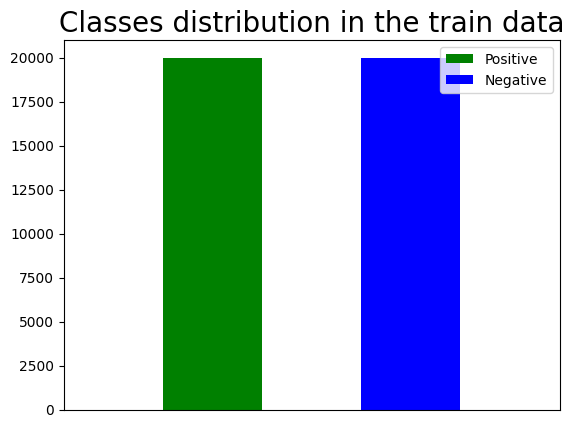

In [ ]:
plt.hist(y_train[y_train == "positive"],
         bins=2, color='green', label='Positive')
plt.hist(y_train[y_train == "negative"],
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data', fontsize=20)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

We have exactly equal amount of positive and negative sentiments. Thus we have no issue of imbalanced data.

In [ ]:
data_lm_hist = data_lm.copy()

In [ ]:
data_lm_hist["review"] = data_lm_hist["review"].apply(tokenizer.tokenize)

In [ ]:
data_lm_hist

,review
0,"[one, reviewer, ha, mention, watch, 1, oz, epi..."
1,"[wonderful, little, production, film, techniqu..."
2,"[think, wa, wonderful, way, spend, time, hot, ..."
3,"[basically, family, little, boy, jake, think, ..."
4,"[petter, matteis, love, time, money, visually,..."
...,...
49995,"[think, movie, right, good, job, wasnt, creati..."
49996,"[bad, plot, bad, dialogue, bad, act, idiotic, ..."
49997,"[catholic, teach, parochial, elementary, schoo..."
49998,"[im, go, disagree, previous, comment, side, ma..."


In [ ]:
y = data["sentiment"]
X = data_lm_hist

X_train_lm_hist, X_test_lm_hist, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train_lm_hist.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
X_train_lm_hist = pd.concat([X_train_lm_hist, y_train], axis=1)
X_train_lm_hist

,review,sentiment
0,"[saw, adam, four, son, first, time, thing, str...",negative
1,"[one, shamelessly, enjoy, every, episode, push...",positive
2,"[movie, journey, mind, screenwriter, catch, pa...",positive
3,"[wa, absolutely, one, best, movie, ive, see, e...",positive
4,"[oh, geez, many, film, want, see, get, stick, ...",negative
...,...,...
37495,"[besides, fact, list, favorite, movie, maker, ...",positive
37496,"[first, time, saw, shade, wa, sneakpreview, ha...",negative
37497,"[wa, waste, time, danger, watch, tempt, tear, ...",negative
37498,"[far, pathetic, movie, indian, cinema, cinema,...",negative


In [ ]:
X_train_lm_hist_pos = X_train_lm_hist[X_train_lm_hist["sentiment"] == "positive"]
X_train_lm_hist_neg = X_train_lm_hist[X_train_lm_hist["sentiment"] == "negative"]
print(X_train_lm_hist_pos.shape)
print(X_train_lm_hist_neg.shape)

(18750, 2)
(18750, 2)


In [ ]:
X_train_lm_hist_pos['review_lenght'] = np.array(list(map(len, X_train_lm_hist_pos['review'])))
median_pos = X_train_lm_hist_pos['review_lenght'].median()
mean_pos = X_train_lm_hist_pos['review_lenght'].mean()
mode_pos = X_train_lm_hist_pos['review_lenght'].mode()[0]
X_train_lm_hist_neg['review_lenght'] = np.array(list(map(len, X_train_lm_hist_neg['review'])))
median_neg = X_train_lm_hist_neg['review_lenght'].median()
mean_neg = X_train_lm_hist_neg['review_lenght'].mean()
mode_neg = X_train_lm_hist_neg['review_lenght'].mode()[0]

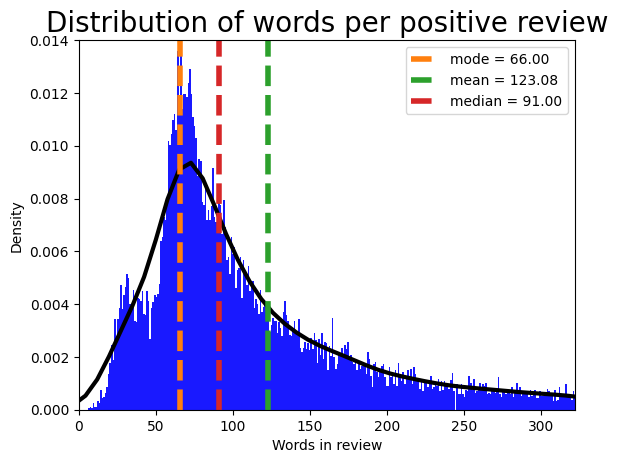

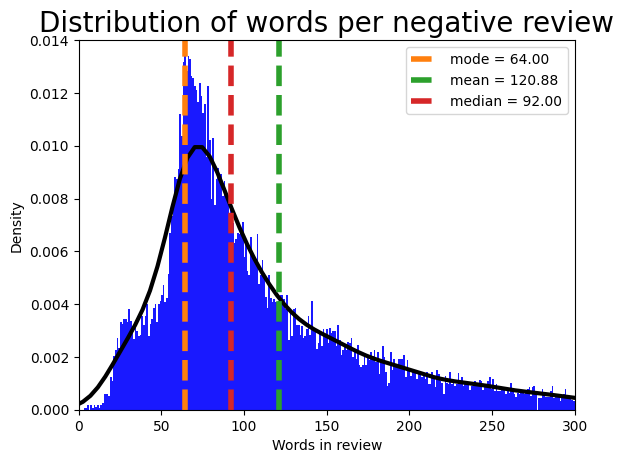

In [ ]:
fig, ax = plt.subplots()
sns.distplot(X_train_lm_hist_pos['review_lenght'], bins=X_train_lm_hist_pos['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(X_train_lm_hist_pos['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode_pos, mode_pos], [0, ymax], '--', label=f'mode = {mode_pos:.2f}', linewidth=4)
ax.plot([mean_pos, mean_pos], [0, ymax], '--', label=f'mean = {mean_pos:.2f}', linewidth=4)
ax.plot([median_pos, median_pos], [0, ymax], '--',
        label=f'median = {median_pos:.2f}', linewidth=4)
ax.set_title('Distribution of words per positive review', fontsize=20)
plt.legend()
plt.show()
fig, ax = plt.subplots()
sns.distplot(X_train_lm_hist_neg['review_lenght'], bins=X_train_lm_hist_neg['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(X_train_lm_hist_neg['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode_neg, mode_neg], [0, ymax], '--', label=f'mode = {mode_neg:.2f}', linewidth=4)
ax.plot([mean_neg, mean_neg], [0, ymax], '--', label=f'mean = {mean_neg:.2f}', linewidth=4)
ax.plot([median_neg, median_neg], [0, ymax], '--',
        label=f'median = {median_neg:.2f}', linewidth=4)
ax.set_title('Distribution of words per negative review', fontsize=20)
plt.legend()
plt.show()

We can see that on average the reviews have length of 120 words. And the average length is almost the same for both sentiments.

## 3.2 Visualizations

### Word frequencies in positive reviews

In [ ]:
data_lm_freq = data_lm.copy()

In [ ]:
y = data["sentiment"]
X = data_lm_freq

X_train_lm_freq, X_test_lm, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.20,
                                                    shuffle=True, stratify=y)

X_train_lm_freq.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
X_train_lm_freq = pd.concat([X_train_lm_freq, y_train], axis=1)
X_train_lm_freq

,review,sentiment
0,catch little gem totally accident back 1980 81...,positive
1,cant believe let movie accomplish favor friend...,negative
2,spoiler alert get nerve people remake use term...,negative
3,one thing ive learn watch george romeros creep...,negative
4,remember wa theater review say wa horrible wel...,negative
...,...,...
39995,1920s man name walt disney wa mission satisfy ...,positive
39996,first time saw shade wa sneakpreview hadnt eve...,negative
39997,wa waste time danger watch tempt tear dvd wall...,negative
39998,far pathetic movie indian cinema cinema ha com...,negative


Here I will collect all the positive and negative texts together to understand general frequencies of the words for different sentiments.

In [ ]:
positive_text = ""
negative_text = ""
for i in range(X_train_lm_freq["review"].shape[0]):
  if X_train_lm_freq["sentiment"][i] == "positive":
    positive_text += " " + X_train_lm_freq["review"][i]
  else:
    negative_text += " " + X_train_lm_freq["review"][i]
print(len(positive_text))
print(len(negative_text))

16379348
15834605


<function matplotlib.pyplot.show(close=None, block=None)>

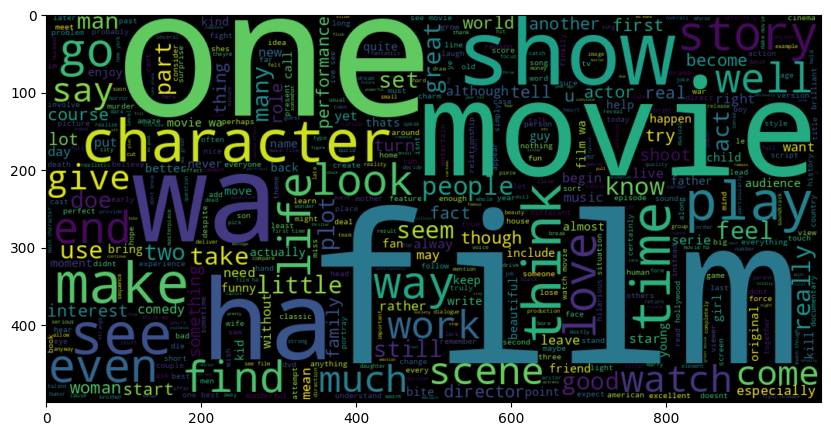

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=positive_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

### Word frequencies in negative reviews

<function matplotlib.pyplot.show(close=None, block=None)>

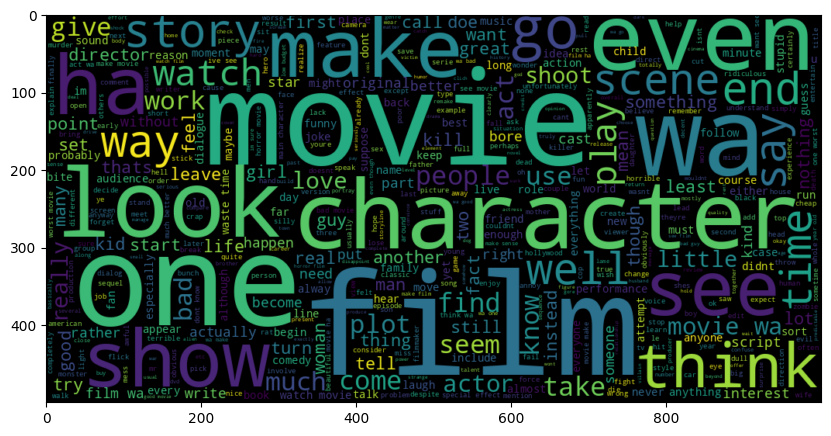

In [ ]:
#word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

We can see that many of the frequent words are the same for both negative and positive reviews, so may be it will be hard for the models to classify the sentiment.

# 4.Word importances

## 4.1 LR weights

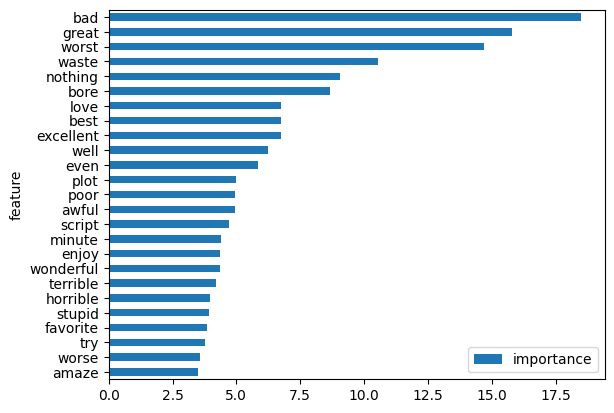

In [ ]:
model = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=seed)
model.fit(tv_X_train_lm, y_train)
w = list(model.coef_[0])
features = tv_X_train_lm.columns
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:pow(x,2),w))# I used square weights to have all of them on the positive side
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[-25:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

## 4.2 Random forest

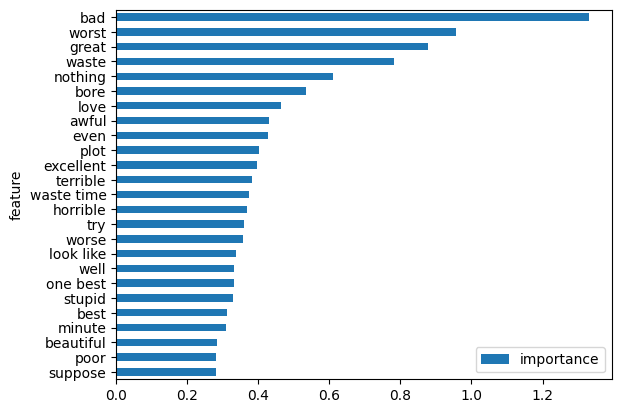

In [ ]:
model = RandomForestClassifier()

model.fit(tv_X_train_lm, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

# fig, ax = plt.subplots()
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(tv_X_train_lm.columns)[indices])
importances = model.feature_importances_
feature_importance = pd.DataFrame(tv_X_train_lm.columns, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:x*100,importances))# I used square weights to have all of them on the positive side
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[-25:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

We can clearly see that the most important words that are decisive for the prediction are the words that convey emotions. For example in the most important words are "bad", "waste", "great", "bore" and "love". That is a very interesting result.

# 5.Best Classical Algorithm

## 5.1 Logistic Regression

In [ ]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
y_train_nn_binary = y_train.apply(lambda x: 1 if x=="positive" else 0)

X_train_nn = torch.tensor(tv_X_train_lm.values, dtype=torch.float32)
y_train_nn = torch.tensor(y_train_nn_binary, dtype=torch.float32).reshape(-1, 1)

# split
X_train, X_test, y_train, y_test = train_test_split(X_train_nn, y_train_nn, random_state=seed,
                                                    test_size = 0.10,
                                                    shuffle=True) #, stratify=y_train_nn)

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1966
         1.0       0.89      0.90      0.90      2034

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

                                        Confusion Matrix


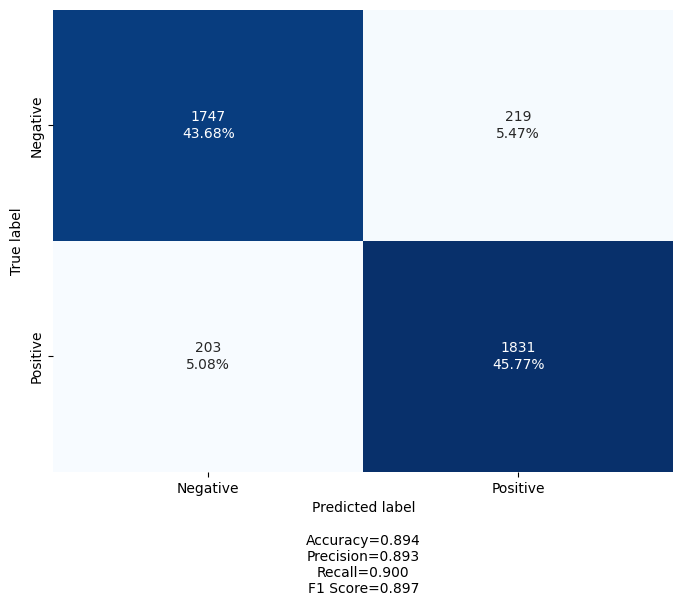

In [ ]:
clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=seed)
clf.fit(X_train, y_train)
originalclass_lr = y_test
predictedclass_lr = clf.predict(X_test)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

# 6.Linear NN Model with Pytorch

## 6.1 Baseline Model

Epoch 0: 100%|██████████| 36/36 [00:00<00:00, 127.37batch/s, acc=0.844, loss=0.675]


Epoch 0 validation: Cross-entropy=0.67, Accuracy=84.6%


Epoch 1: 100%|██████████| 36/36 [00:00<00:00, 128.68batch/s, acc=0.906, loss=0.65] 


Epoch 1 validation: Cross-entropy=0.66, Accuracy=85.0%


Epoch 2: 100%|██████████| 36/36 [00:00<00:00, 128.21batch/s, acc=0.919, loss=0.628]


Epoch 2 validation: Cross-entropy=0.64, Accuracy=85.4%


Epoch 3: 100%|██████████| 36/36 [00:00<00:00, 125.73batch/s, acc=0.919, loss=0.606]


Epoch 3 validation: Cross-entropy=0.62, Accuracy=85.4%


Epoch 4: 100%|██████████| 36/36 [00:00<00:00, 136.71batch/s, acc=0.919, loss=0.586]


Epoch 4 validation: Cross-entropy=0.61, Accuracy=85.5%


Epoch 5: 100%|██████████| 36/36 [00:00<00:00, 129.18batch/s, acc=0.919, loss=0.567]


Epoch 5 validation: Cross-entropy=0.59, Accuracy=85.6%


Epoch 6: 100%|██████████| 36/36 [00:00<00:00, 131.64batch/s, acc=0.925, loss=0.55] 


Epoch 6 validation: Cross-entropy=0.58, Accuracy=85.6%


Epoch 7: 100%|██████████| 36/36 [00:00<00:00, 130.67batch/s, acc=0.931, loss=0.533]


Epoch 7 validation: Cross-entropy=0.57, Accuracy=85.8%


Epoch 8: 100%|██████████| 36/36 [00:00<00:00, 129.00batch/s, acc=0.938, loss=0.517]


Epoch 8 validation: Cross-entropy=0.56, Accuracy=86.0%


Epoch 9: 100%|██████████| 36/36 [00:00<00:00, 132.40batch/s, acc=0.95, loss=0.502] 


Epoch 9 validation: Cross-entropy=0.55, Accuracy=86.1%


Epoch 10: 100%|██████████| 36/36 [00:00<00:00, 126.63batch/s, acc=0.95, loss=0.487] 


Epoch 10 validation: Cross-entropy=0.54, Accuracy=86.2%


Epoch 11: 100%|██████████| 36/36 [00:00<00:00, 126.16batch/s, acc=0.95, loss=0.473] 


Epoch 11 validation: Cross-entropy=0.53, Accuracy=86.3%


Epoch 12: 100%|██████████| 36/36 [00:00<00:00, 132.78batch/s, acc=0.956, loss=0.46] 


Epoch 12 validation: Cross-entropy=0.52, Accuracy=86.4%


Epoch 13: 100%|██████████| 36/36 [00:00<00:00, 124.69batch/s, acc=0.956, loss=0.448]


Epoch 13 validation: Cross-entropy=0.51, Accuracy=86.5%


Epoch 14: 100%|██████████| 36/36 [00:00<00:00, 128.42batch/s, acc=0.969, loss=0.436]


Epoch 14 validation: Cross-entropy=0.50, Accuracy=86.6%


Epoch 15: 100%|██████████| 36/36 [00:00<00:00, 126.19batch/s, acc=0.969, loss=0.425]


Epoch 15 validation: Cross-entropy=0.49, Accuracy=86.7%


Epoch 16: 100%|██████████| 36/36 [00:00<00:00, 122.34batch/s, acc=0.969, loss=0.414]


Epoch 16 validation: Cross-entropy=0.48, Accuracy=86.9%


Epoch 17: 100%|██████████| 36/36 [00:00<00:00, 121.86batch/s, acc=0.969, loss=0.404]


Epoch 17 validation: Cross-entropy=0.48, Accuracy=86.9%


Epoch 18: 100%|██████████| 36/36 [00:00<00:00, 120.72batch/s, acc=0.969, loss=0.394]


Epoch 18 validation: Cross-entropy=0.47, Accuracy=87.0%


Epoch 19: 100%|██████████| 36/36 [00:00<00:00, 130.00batch/s, acc=0.981, loss=0.384]


Epoch 19 validation: Cross-entropy=0.46, Accuracy=87.1%


Epoch 20: 100%|██████████| 36/36 [00:00<00:00, 132.17batch/s, acc=0.988, loss=0.375]


Epoch 20 validation: Cross-entropy=0.46, Accuracy=87.2%


Epoch 21: 100%|██████████| 36/36 [00:00<00:00, 135.56batch/s, acc=0.988, loss=0.366]


Epoch 21 validation: Cross-entropy=0.45, Accuracy=87.2%


Epoch 22: 100%|██████████| 36/36 [00:00<00:00, 122.43batch/s, acc=0.988, loss=0.358]


Epoch 22 validation: Cross-entropy=0.45, Accuracy=87.3%


Epoch 23: 100%|██████████| 36/36 [00:00<00:00, 123.82batch/s, acc=0.988, loss=0.35] 


Epoch 23 validation: Cross-entropy=0.44, Accuracy=87.4%


Epoch 24: 100%|██████████| 36/36 [00:00<00:00, 126.40batch/s, acc=0.988, loss=0.342]


Epoch 24 validation: Cross-entropy=0.44, Accuracy=87.4%


Epoch 25: 100%|██████████| 36/36 [00:00<00:00, 138.29batch/s, acc=0.988, loss=0.334]


Epoch 25 validation: Cross-entropy=0.43, Accuracy=87.5%


Epoch 26: 100%|██████████| 36/36 [00:00<00:00, 129.69batch/s, acc=0.988, loss=0.327]


Epoch 26 validation: Cross-entropy=0.43, Accuracy=87.6%


Epoch 27: 100%|██████████| 36/36 [00:00<00:00, 125.98batch/s, acc=0.988, loss=0.32] 


Epoch 27 validation: Cross-entropy=0.42, Accuracy=87.7%


Epoch 28: 100%|██████████| 36/36 [00:00<00:00, 129.59batch/s, acc=0.988, loss=0.313]


Epoch 28 validation: Cross-entropy=0.42, Accuracy=87.7%


Epoch 29: 100%|██████████| 36/36 [00:00<00:00, 132.01batch/s, acc=0.988, loss=0.307]


Epoch 29 validation: Cross-entropy=0.41, Accuracy=87.7%


Epoch 30: 100%|██████████| 36/36 [00:00<00:00, 127.49batch/s, acc=0.988, loss=0.301]


Epoch 30 validation: Cross-entropy=0.41, Accuracy=87.9%


Epoch 31: 100%|██████████| 36/36 [00:00<00:00, 132.24batch/s, acc=0.988, loss=0.294]


Epoch 31 validation: Cross-entropy=0.40, Accuracy=87.9%


Epoch 32: 100%|██████████| 36/36 [00:00<00:00, 136.65batch/s, acc=0.988, loss=0.289]


Epoch 32 validation: Cross-entropy=0.40, Accuracy=88.1%


Epoch 33: 100%|██████████| 36/36 [00:00<00:00, 129.04batch/s, acc=0.988, loss=0.283]


Epoch 33 validation: Cross-entropy=0.40, Accuracy=88.2%


Epoch 34: 100%|██████████| 36/36 [00:00<00:00, 126.61batch/s, acc=0.988, loss=0.277]


Epoch 34 validation: Cross-entropy=0.39, Accuracy=88.2%


Epoch 35: 100%|██████████| 36/36 [00:00<00:00, 125.57batch/s, acc=0.988, loss=0.272]


Epoch 35 validation: Cross-entropy=0.39, Accuracy=88.3%


Epoch 36: 100%|██████████| 36/36 [00:00<00:00, 133.45batch/s, acc=0.988, loss=0.267]


Epoch 36 validation: Cross-entropy=0.39, Accuracy=88.4%


Epoch 37: 100%|██████████| 36/36 [00:00<00:00, 116.97batch/s, acc=0.988, loss=0.262]


Epoch 37 validation: Cross-entropy=0.38, Accuracy=88.5%


Epoch 38: 100%|██████████| 36/36 [00:00<00:00, 130.55batch/s, acc=0.988, loss=0.257]


Epoch 38 validation: Cross-entropy=0.38, Accuracy=88.5%


Epoch 39: 100%|██████████| 36/36 [00:00<00:00, 136.24batch/s, acc=0.988, loss=0.252]


Epoch 39 validation: Cross-entropy=0.38, Accuracy=88.4%


Epoch 40: 100%|██████████| 36/36 [00:00<00:00, 132.98batch/s, acc=0.988, loss=0.248]


Epoch 40 validation: Cross-entropy=0.37, Accuracy=88.5%


Epoch 41: 100%|██████████| 36/36 [00:00<00:00, 127.95batch/s, acc=0.988, loss=0.243]


Epoch 41 validation: Cross-entropy=0.37, Accuracy=88.7%


Epoch 42: 100%|██████████| 36/36 [00:00<00:00, 132.50batch/s, acc=0.988, loss=0.239]


Epoch 42 validation: Cross-entropy=0.37, Accuracy=88.7%


Epoch 43: 100%|██████████| 36/36 [00:00<00:00, 137.97batch/s, acc=0.988, loss=0.235]


Epoch 43 validation: Cross-entropy=0.36, Accuracy=88.7%


Epoch 44: 100%|██████████| 36/36 [00:00<00:00, 118.31batch/s, acc=0.988, loss=0.231]


Epoch 44 validation: Cross-entropy=0.36, Accuracy=88.7%


Epoch 45: 100%|██████████| 36/36 [00:00<00:00, 128.17batch/s, acc=0.988, loss=0.227]


Epoch 45 validation: Cross-entropy=0.36, Accuracy=88.8%


Epoch 46: 100%|██████████| 36/36 [00:00<00:00, 133.69batch/s, acc=0.988, loss=0.223]


Epoch 46 validation: Cross-entropy=0.36, Accuracy=88.9%


Epoch 47: 100%|██████████| 36/36 [00:00<00:00, 134.82batch/s, acc=0.988, loss=0.219]


Epoch 47 validation: Cross-entropy=0.35, Accuracy=89.0%


Epoch 48: 100%|██████████| 36/36 [00:00<00:00, 126.26batch/s, acc=0.994, loss=0.215]


Epoch 48 validation: Cross-entropy=0.35, Accuracy=89.0%


Epoch 49: 100%|██████████| 36/36 [00:00<00:00, 130.87batch/s, acc=0.994, loss=0.212]


Epoch 49 validation: Cross-entropy=0.35, Accuracy=89.0%


Epoch 50: 100%|██████████| 36/36 [00:00<00:00, 136.37batch/s, acc=0.994, loss=0.208]


Epoch 50 validation: Cross-entropy=0.35, Accuracy=89.0%


Epoch 51: 100%|██████████| 36/36 [00:00<00:00, 132.04batch/s, acc=0.994, loss=0.205]


Epoch 51 validation: Cross-entropy=0.34, Accuracy=89.1%


Epoch 52: 100%|██████████| 36/36 [00:00<00:00, 127.61batch/s, acc=0.994, loss=0.202]


Epoch 52 validation: Cross-entropy=0.34, Accuracy=89.2%


Epoch 53: 100%|██████████| 36/36 [00:00<00:00, 135.04batch/s, acc=0.994, loss=0.198]


Epoch 53 validation: Cross-entropy=0.34, Accuracy=89.3%


Epoch 54: 100%|██████████| 36/36 [00:00<00:00, 138.13batch/s, acc=0.994, loss=0.195]


Epoch 54 validation: Cross-entropy=0.34, Accuracy=89.3%


Epoch 55: 100%|██████████| 36/36 [00:00<00:00, 128.69batch/s, acc=0.994, loss=0.192]


Epoch 55 validation: Cross-entropy=0.34, Accuracy=89.4%


Epoch 56: 100%|██████████| 36/36 [00:00<00:00, 127.41batch/s, acc=0.994, loss=0.189]


Epoch 56 validation: Cross-entropy=0.33, Accuracy=89.4%


Epoch 57: 100%|██████████| 36/36 [00:00<00:00, 136.87batch/s, acc=0.994, loss=0.186]


Epoch 57 validation: Cross-entropy=0.33, Accuracy=89.5%


Epoch 58: 100%|██████████| 36/36 [00:00<00:00, 133.39batch/s, acc=0.994, loss=0.184]


Epoch 58 validation: Cross-entropy=0.33, Accuracy=89.5%


Epoch 59: 100%|██████████| 36/36 [00:00<00:00, 128.14batch/s, acc=0.994, loss=0.181]


Epoch 59 validation: Cross-entropy=0.33, Accuracy=89.5%


Epoch 60: 100%|██████████| 36/36 [00:00<00:00, 133.57batch/s, acc=0.994, loss=0.178]


Epoch 60 validation: Cross-entropy=0.33, Accuracy=89.5%


Epoch 61: 100%|██████████| 36/36 [00:00<00:00, 136.41batch/s, acc=0.994, loss=0.176]


Epoch 61 validation: Cross-entropy=0.33, Accuracy=89.5%


Epoch 62: 100%|██████████| 36/36 [00:00<00:00, 128.50batch/s, acc=0.994, loss=0.173]


Epoch 62 validation: Cross-entropy=0.32, Accuracy=89.4%


Epoch 63: 100%|██████████| 36/36 [00:00<00:00, 130.08batch/s, acc=0.994, loss=0.171]


Epoch 63 validation: Cross-entropy=0.32, Accuracy=89.5%


Epoch 64: 100%|██████████| 36/36 [00:00<00:00, 139.43batch/s, acc=0.994, loss=0.168]


Epoch 64 validation: Cross-entropy=0.32, Accuracy=89.5%


Epoch 65: 100%|██████████| 36/36 [00:00<00:00, 133.41batch/s, acc=0.994, loss=0.166]


Epoch 65 validation: Cross-entropy=0.32, Accuracy=89.5%


Epoch 66: 100%|██████████| 36/36 [00:00<00:00, 132.68batch/s, acc=0.994, loss=0.163]


Epoch 66 validation: Cross-entropy=0.32, Accuracy=89.5%


Epoch 67: 100%|██████████| 36/36 [00:00<00:00, 133.65batch/s, acc=0.994, loss=0.161]


Epoch 67 validation: Cross-entropy=0.32, Accuracy=89.5%


Epoch 68: 100%|██████████| 36/36 [00:00<00:00, 134.10batch/s, acc=0.994, loss=0.159]


Epoch 68 validation: Cross-entropy=0.31, Accuracy=89.5%


Epoch 69: 100%|██████████| 36/36 [00:00<00:00, 131.39batch/s, acc=0.994, loss=0.157]


Epoch 69 validation: Cross-entropy=0.31, Accuracy=89.6%


Epoch 70: 100%|██████████| 36/36 [00:00<00:00, 130.48batch/s, acc=0.994, loss=0.155]


Epoch 70 validation: Cross-entropy=0.31, Accuracy=89.6%


Epoch 71: 100%|██████████| 36/36 [00:00<00:00, 137.37batch/s, acc=0.994, loss=0.153]


Epoch 71 validation: Cross-entropy=0.31, Accuracy=89.6%


Epoch 72: 100%|██████████| 36/36 [00:00<00:00, 132.59batch/s, acc=0.994, loss=0.15] 


Epoch 72 validation: Cross-entropy=0.31, Accuracy=89.7%


Epoch 73: 100%|██████████| 36/36 [00:00<00:00, 132.49batch/s, acc=0.994, loss=0.148]


Epoch 73 validation: Cross-entropy=0.31, Accuracy=89.7%


Epoch 74: 100%|██████████| 36/36 [00:00<00:00, 135.05batch/s, acc=0.994, loss=0.147]


Epoch 74 validation: Cross-entropy=0.31, Accuracy=89.7%


Epoch 75: 100%|██████████| 36/36 [00:00<00:00, 133.52batch/s, acc=0.994, loss=0.145]


Epoch 75 validation: Cross-entropy=0.31, Accuracy=89.7%


Epoch 76: 100%|██████████| 36/36 [00:00<00:00, 122.80batch/s, acc=0.994, loss=0.143]


Epoch 76 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 77: 100%|██████████| 36/36 [00:00<00:00, 124.79batch/s, acc=0.994, loss=0.141]


Epoch 77 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 78: 100%|██████████| 36/36 [00:00<00:00, 132.60batch/s, acc=0.994, loss=0.139]


Epoch 78 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 79: 100%|██████████| 36/36 [00:00<00:00, 124.55batch/s, acc=0.994, loss=0.137]


Epoch 79 validation: Cross-entropy=0.30, Accuracy=89.8%


Epoch 80: 100%|██████████| 36/36 [00:00<00:00, 122.93batch/s, acc=1, loss=0.136]    


Epoch 80 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 81: 100%|██████████| 36/36 [00:00<00:00, 125.71batch/s, acc=1, loss=0.134]    


Epoch 81 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 82: 100%|██████████| 36/36 [00:00<00:00, 127.59batch/s, acc=1, loss=0.132]    


Epoch 82 validation: Cross-entropy=0.30, Accuracy=89.7%


Epoch 83: 100%|██████████| 36/36 [00:00<00:00, 121.63batch/s, acc=1, loss=0.131]    


Epoch 83 validation: Cross-entropy=0.30, Accuracy=89.8%


Epoch 84: 100%|██████████| 36/36 [00:00<00:00, 124.40batch/s, acc=1, loss=0.129]    


Epoch 84 validation: Cross-entropy=0.29, Accuracy=89.8%


Epoch 85: 100%|██████████| 36/36 [00:00<00:00, 127.16batch/s, acc=1, loss=0.128]    


Epoch 85 validation: Cross-entropy=0.29, Accuracy=89.8%


Epoch 86: 100%|██████████| 36/36 [00:00<00:00, 126.62batch/s, acc=1, loss=0.126]    


Epoch 86 validation: Cross-entropy=0.29, Accuracy=89.8%


Epoch 87: 100%|██████████| 36/36 [00:00<00:00, 124.97batch/s, acc=1, loss=0.125]    


Epoch 87 validation: Cross-entropy=0.29, Accuracy=89.8%


Epoch 88: 100%|██████████| 36/36 [00:00<00:00, 132.22batch/s, acc=1, loss=0.123]    


Epoch 88 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 89: 100%|██████████| 36/36 [00:00<00:00, 130.43batch/s, acc=1, loss=0.122]    


Epoch 89 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 90: 100%|██████████| 36/36 [00:00<00:00, 120.77batch/s, acc=1, loss=0.12]     


Epoch 90 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 91: 100%|██████████| 36/36 [00:00<00:00, 125.94batch/s, acc=1, loss=0.119]    


Epoch 91 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 92: 100%|██████████| 36/36 [00:00<00:00, 130.76batch/s, acc=1, loss=0.117]    


Epoch 92 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 93: 100%|██████████| 36/36 [00:00<00:00, 124.36batch/s, acc=1, loss=0.116]    


Epoch 93 validation: Cross-entropy=0.29, Accuracy=89.9%


Epoch 94: 100%|██████████| 36/36 [00:00<00:00, 125.41batch/s, acc=1, loss=0.115]    


Epoch 94 validation: Cross-entropy=0.29, Accuracy=90.0%


Epoch 95: 100%|██████████| 36/36 [00:00<00:00, 131.04batch/s, acc=1, loss=0.114]    


Epoch 95 validation: Cross-entropy=0.28, Accuracy=90.0%


Epoch 96: 100%|██████████| 36/36 [00:00<00:00, 127.70batch/s, acc=1, loss=0.112]    


Epoch 96 validation: Cross-entropy=0.28, Accuracy=90.0%


Epoch 97: 100%|██████████| 36/36 [00:00<00:00, 123.18batch/s, acc=1, loss=0.111]    


Epoch 97 validation: Cross-entropy=0.28, Accuracy=90.0%


Epoch 98: 100%|██████████| 36/36 [00:00<00:00, 129.95batch/s, acc=1, loss=0.11]     


Epoch 98 validation: Cross-entropy=0.28, Accuracy=90.0%


Epoch 99: 100%|██████████| 36/36 [00:00<00:00, 130.03batch/s, acc=1, loss=0.109]    


Epoch 99 validation: Cross-entropy=0.28, Accuracy=90.0%


Epoch 100: 100%|██████████| 36/36 [00:00<00:00, 123.17batch/s, acc=1, loss=0.107]    


Epoch 100 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 101: 100%|██████████| 36/36 [00:00<00:00, 127.87batch/s, acc=1, loss=0.106]    


Epoch 101 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 102: 100%|██████████| 36/36 [00:00<00:00, 132.10batch/s, acc=1, loss=0.105]    


Epoch 102 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 103: 100%|██████████| 36/36 [00:00<00:00, 124.62batch/s, acc=1, loss=0.104]    


Epoch 103 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 104: 100%|██████████| 36/36 [00:00<00:00, 122.78batch/s, acc=1, loss=0.103]    


Epoch 104 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 105: 100%|██████████| 36/36 [00:00<00:00, 126.67batch/s, acc=1, loss=0.102]    


Epoch 105 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 106: 100%|██████████| 36/36 [00:00<00:00, 123.75batch/s, acc=1, loss=0.101]    


Epoch 106 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 107: 100%|██████████| 36/36 [00:00<00:00, 123.31batch/s, acc=1, loss=0.0998]   


Epoch 107 validation: Cross-entropy=0.28, Accuracy=90.1%


Epoch 108: 100%|██████████| 36/36 [00:00<00:00, 127.24batch/s, acc=1, loss=0.0988]   


Epoch 108 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 109: 100%|██████████| 36/36 [00:00<00:00, 131.77batch/s, acc=1, loss=0.0978]   


Epoch 109 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 110: 100%|██████████| 36/36 [00:00<00:00, 123.42batch/s, acc=1, loss=0.0968]   


Epoch 110 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 111: 100%|██████████| 36/36 [00:00<00:00, 123.52batch/s, acc=1, loss=0.0958]   


Epoch 111 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 112: 100%|██████████| 36/36 [00:00<00:00, 127.99batch/s, acc=1, loss=0.0949]   


Epoch 112 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 113: 100%|██████████| 36/36 [00:00<00:00, 120.77batch/s, acc=1, loss=0.0939]   


Epoch 113 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 114: 100%|██████████| 36/36 [00:00<00:00, 125.06batch/s, acc=1, loss=0.093]    


Epoch 114 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 115: 100%|██████████| 36/36 [00:00<00:00, 133.95batch/s, acc=1, loss=0.0921]   


Epoch 115 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 116: 100%|██████████| 36/36 [00:00<00:00, 129.39batch/s, acc=1, loss=0.0912]   


Epoch 116 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 117: 100%|██████████| 36/36 [00:00<00:00, 123.25batch/s, acc=1, loss=0.0903]   


Epoch 117 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 118: 100%|██████████| 36/36 [00:00<00:00, 128.10batch/s, acc=1, loss=0.0895]   


Epoch 118 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 119: 100%|██████████| 36/36 [00:00<00:00, 125.68batch/s, acc=1, loss=0.0886]   


Epoch 119 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 120: 100%|██████████| 36/36 [00:00<00:00, 122.53batch/s, acc=1, loss=0.0878]   


Epoch 120 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 121: 100%|██████████| 36/36 [00:00<00:00, 125.72batch/s, acc=1, loss=0.0869]   


Epoch 121 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 122: 100%|██████████| 36/36 [00:00<00:00, 130.68batch/s, acc=1, loss=0.0861]   


Epoch 122 validation: Cross-entropy=0.27, Accuracy=90.1%


Epoch 123: 100%|██████████| 36/36 [00:00<00:00, 127.17batch/s, acc=1, loss=0.0853]   


Epoch 123 validation: Cross-entropy=0.27, Accuracy=90.2%


Epoch 124: 100%|██████████| 36/36 [00:00<00:00, 124.25batch/s, acc=1, loss=0.0845]   


Epoch 124 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 125: 100%|██████████| 36/36 [00:00<00:00, 128.07batch/s, acc=1, loss=0.0838]   


Epoch 125 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 126: 100%|██████████| 36/36 [00:00<00:00, 131.93batch/s, acc=1, loss=0.083]    


Epoch 126 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 127: 100%|██████████| 36/36 [00:00<00:00, 117.11batch/s, acc=1, loss=0.0823]   


Epoch 127 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 128: 100%|██████████| 36/36 [00:00<00:00, 128.66batch/s, acc=1, loss=0.0815]   


Epoch 128 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 129: 100%|██████████| 36/36 [00:00<00:00, 133.13batch/s, acc=1, loss=0.0808]   


Epoch 129 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 130: 100%|██████████| 36/36 [00:00<00:00, 123.41batch/s, acc=1, loss=0.0801]   


Epoch 130 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 131: 100%|██████████| 36/36 [00:00<00:00, 124.57batch/s, acc=1, loss=0.0794]   


Epoch 131 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 132: 100%|██████████| 36/36 [00:00<00:00, 126.02batch/s, acc=1, loss=0.0787]   


Epoch 132 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 133: 100%|██████████| 36/36 [00:00<00:00, 120.90batch/s, acc=1, loss=0.078]    


Epoch 133 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 134: 100%|██████████| 36/36 [00:00<00:00, 120.69batch/s, acc=1, loss=0.0773]   


Epoch 134 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 135: 100%|██████████| 36/36 [00:00<00:00, 128.50batch/s, acc=1, loss=0.0767]   


Epoch 135 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 136: 100%|██████████| 36/36 [00:00<00:00, 125.05batch/s, acc=1, loss=0.076]    


Epoch 136 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 137: 100%|██████████| 36/36 [00:00<00:00, 118.29batch/s, acc=1, loss=0.0754]   


Epoch 137 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 138: 100%|██████████| 36/36 [00:00<00:00, 124.71batch/s, acc=1, loss=0.0747]   


Epoch 138 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 139: 100%|██████████| 36/36 [00:00<00:00, 130.17batch/s, acc=1, loss=0.0741]   


Epoch 139 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 140: 100%|██████████| 36/36 [00:00<00:00, 122.58batch/s, acc=1, loss=0.0735]   


Epoch 140 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 141: 100%|██████████| 36/36 [00:00<00:00, 128.56batch/s, acc=1, loss=0.0729]   


Epoch 141 validation: Cross-entropy=0.26, Accuracy=90.3%


Epoch 142: 100%|██████████| 36/36 [00:00<00:00, 132.26batch/s, acc=1, loss=0.0723]  


Epoch 142 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 143: 100%|██████████| 36/36 [00:00<00:00, 127.07batch/s, acc=1, loss=0.0717]  


Epoch 143 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 144: 100%|██████████| 36/36 [00:00<00:00, 119.69batch/s, acc=1, loss=0.0711]   


Epoch 144 validation: Cross-entropy=0.26, Accuracy=90.2%


Epoch 145: 100%|██████████| 36/36 [00:00<00:00, 129.40batch/s, acc=1, loss=0.0705]   


Epoch 145 validation: Cross-entropy=0.26, Accuracy=90.3%


Epoch 146: 100%|██████████| 36/36 [00:00<00:00, 128.62batch/s, acc=1, loss=0.07]     


Epoch 146 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 147: 100%|██████████| 36/36 [00:00<00:00, 117.46batch/s, acc=1, loss=0.0694]   


Epoch 147 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 148: 100%|██████████| 36/36 [00:00<00:00, 128.55batch/s, acc=1, loss=0.0688]   


Epoch 148 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 149: 100%|██████████| 36/36 [00:00<00:00, 130.08batch/s, acc=1, loss=0.0683]   


Epoch 149 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 150: 100%|██████████| 36/36 [00:00<00:00, 122.19batch/s, acc=1, loss=0.0678]   


Epoch 150 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 151: 100%|██████████| 36/36 [00:00<00:00, 124.15batch/s, acc=1, loss=0.0672]   


Epoch 151 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 152: 100%|██████████| 36/36 [00:00<00:00, 128.18batch/s, acc=1, loss=0.0667]   


Epoch 152 validation: Cross-entropy=0.25, Accuracy=90.3%


Epoch 153: 100%|██████████| 36/36 [00:00<00:00, 126.80batch/s, acc=1, loss=0.0662]   


Epoch 153 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 154: 100%|██████████| 36/36 [00:00<00:00, 124.34batch/s, acc=1, loss=0.0657]   


Epoch 154 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 155: 100%|██████████| 36/36 [00:00<00:00, 131.51batch/s, acc=1, loss=0.0652]   


Epoch 155 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 156: 100%|██████████| 36/36 [00:00<00:00, 135.04batch/s, acc=1, loss=0.0647]  


Epoch 156 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 157: 100%|██████████| 36/36 [00:00<00:00, 116.41batch/s, acc=1, loss=0.0642]   


Epoch 157 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 158: 100%|██████████| 36/36 [00:00<00:00, 125.52batch/s, acc=1, loss=0.0637]   


Epoch 158 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 159: 100%|██████████| 36/36 [00:00<00:00, 130.64batch/s, acc=1, loss=0.0633]   


Epoch 159 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 160: 100%|██████████| 36/36 [00:00<00:00, 123.27batch/s, acc=1, loss=0.0628]   


Epoch 160 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 161: 100%|██████████| 36/36 [00:00<00:00, 125.34batch/s, acc=1, loss=0.0623]   


Epoch 161 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 162: 100%|██████████| 36/36 [00:00<00:00, 129.98batch/s, acc=1, loss=0.0619]   


Epoch 162 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 163: 100%|██████████| 36/36 [00:00<00:00, 132.51batch/s, acc=1, loss=0.0614]   


Epoch 163 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 164: 100%|██████████| 36/36 [00:00<00:00, 120.34batch/s, acc=1, loss=0.061]    


Epoch 164 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 165: 100%|██████████| 36/36 [00:00<00:00, 126.32batch/s, acc=1, loss=0.0605]   


Epoch 165 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 166: 100%|██████████| 36/36 [00:00<00:00, 127.28batch/s, acc=1, loss=0.0601]   


Epoch 166 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 167: 100%|██████████| 36/36 [00:00<00:00, 120.38batch/s, acc=1, loss=0.0597]   


Epoch 167 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 168: 100%|██████████| 36/36 [00:00<00:00, 126.15batch/s, acc=1, loss=0.0592]  


Epoch 168 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 169: 100%|██████████| 36/36 [00:00<00:00, 120.95batch/s, acc=1, loss=0.0588]   


Epoch 169 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 170: 100%|██████████| 36/36 [00:00<00:00, 123.72batch/s, acc=1, loss=0.0584]   


Epoch 170 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 171: 100%|██████████| 36/36 [00:00<00:00, 124.05batch/s, acc=1, loss=0.058]    


Epoch 171 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 172: 100%|██████████| 36/36 [00:00<00:00, 125.31batch/s, acc=1, loss=0.0576]   


Epoch 172 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 173: 100%|██████████| 36/36 [00:00<00:00, 120.38batch/s, acc=1, loss=0.0572]   


Epoch 173 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 174: 100%|██████████| 36/36 [00:00<00:00, 122.07batch/s, acc=1, loss=0.0568]   


Epoch 174 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 175: 100%|██████████| 36/36 [00:00<00:00, 128.53batch/s, acc=1, loss=0.0564]   


Epoch 175 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 176: 100%|██████████| 36/36 [00:00<00:00, 125.28batch/s, acc=1, loss=0.056]    


Epoch 176 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 177: 100%|██████████| 36/36 [00:00<00:00, 124.47batch/s, acc=1, loss=0.0557]   


Epoch 177 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 178: 100%|██████████| 36/36 [00:00<00:00, 134.73batch/s, acc=1, loss=0.0553]   


Epoch 178 validation: Cross-entropy=0.25, Accuracy=90.5%


Epoch 179: 100%|██████████| 36/36 [00:00<00:00, 119.44batch/s, acc=1, loss=0.0549]   


Epoch 179 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 180: 100%|██████████| 36/36 [00:00<00:00, 125.50batch/s, acc=1, loss=0.0546]   


Epoch 180 validation: Cross-entropy=0.25, Accuracy=90.4%


Epoch 181: 100%|██████████| 36/36 [00:00<00:00, 126.73batch/s, acc=1, loss=0.0542]   


Epoch 181 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 182: 100%|██████████| 36/36 [00:00<00:00, 125.22batch/s, acc=1, loss=0.0538]   


Epoch 182 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 183: 100%|██████████| 36/36 [00:00<00:00, 127.24batch/s, acc=1, loss=0.0535]   


Epoch 183 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 184: 100%|██████████| 36/36 [00:00<00:00, 120.16batch/s, acc=1, loss=0.0532]   


Epoch 184 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 185: 100%|██████████| 36/36 [00:00<00:00, 125.05batch/s, acc=1, loss=0.0528]   


Epoch 185 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 186: 100%|██████████| 36/36 [00:00<00:00, 126.89batch/s, acc=1, loss=0.0525]  


Epoch 186 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 187: 100%|██████████| 36/36 [00:00<00:00, 120.39batch/s, acc=1, loss=0.0521]   


Epoch 187 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 188: 100%|██████████| 36/36 [00:00<00:00, 126.74batch/s, acc=1, loss=0.0518]  


Epoch 188 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 189: 100%|██████████| 36/36 [00:00<00:00, 135.07batch/s, acc=1, loss=0.0515]  


Epoch 189 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 190: 100%|██████████| 36/36 [00:00<00:00, 121.24batch/s, acc=1, loss=0.0512]   


Epoch 190 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 191: 100%|██████████| 36/36 [00:00<00:00, 125.23batch/s, acc=1, loss=0.0508]   


Epoch 191 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 192: 100%|██████████| 36/36 [00:00<00:00, 131.15batch/s, acc=1, loss=0.0505]   


Epoch 192 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 193: 100%|██████████| 36/36 [00:00<00:00, 120.58batch/s, acc=1, loss=0.0502]   


Epoch 193 validation: Cross-entropy=0.24, Accuracy=90.4%


Epoch 194: 100%|██████████| 36/36 [00:00<00:00, 118.80batch/s, acc=1, loss=0.0499]   


Epoch 194 validation: Cross-entropy=0.24, Accuracy=90.3%


Epoch 195: 100%|██████████| 36/36 [00:00<00:00, 125.43batch/s, acc=1, loss=0.0496]   


Epoch 195 validation: Cross-entropy=0.24, Accuracy=90.3%


Epoch 196: 100%|██████████| 36/36 [00:00<00:00, 122.30batch/s, acc=1, loss=0.0493]   


Epoch 196 validation: Cross-entropy=0.24, Accuracy=90.3%


Epoch 197: 100%|██████████| 36/36 [00:00<00:00, 121.24batch/s, acc=1, loss=0.049]    


Epoch 197 validation: Cross-entropy=0.24, Accuracy=90.3%


Epoch 198: 100%|██████████| 36/36 [00:00<00:00, 131.17batch/s, acc=1, loss=0.0487]  


Epoch 198 validation: Cross-entropy=0.24, Accuracy=90.3%


Epoch 199: 100%|██████████| 36/36 [00:00<00:00, 122.12batch/s, acc=1, loss=0.0484]  


Epoch 199 validation: Cross-entropy=0.24, Accuracy=90.3%


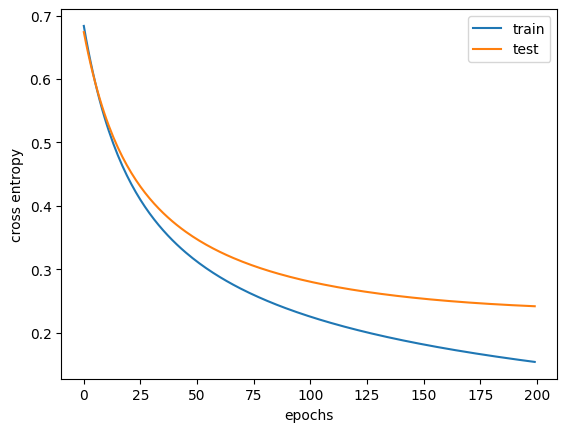

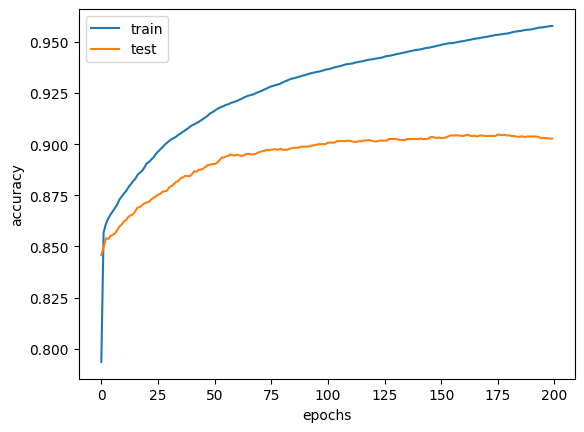

In [ ]:
class Classificator(nn.Module):
    def __init__(self):
        super().__init__()
        # self.hidden1 = nn.Linear(21032, 32)
        # self.act1 = nn.ReLU()
        # self.hidden2 = nn.Linear(12, 8)
        # self.act2 = nn.ReLU()
        self.output = nn.Linear(16107, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        # x = self.act1(self.hidden1(x))
        # x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

# loss metric and optimizer
model = Classificator()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 200
batch_size = 1024
batches_per_epoch = len(X_train) // batch_size + 1

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (y_pred.round() == y_batch).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (y_pred.round() == y_test).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
def reverse_one_hot_encoder(predictions, number_of_classes = 1, column_names = ["sentiment"]):
  preds = pd.DataFrame(predictions, columns = column_names)
  preds["target"] = 0
  for col in column_names:
    preds["target"] = preds[col].apply(lambda x: 0 if 1-x > x-0 else 1)
  return preds["target"]

In [ ]:
y_test_nn_binary = y_test.apply(lambda x: 1 if x=="positive" else 0)

X_test_nn = torch.tensor(tv_X_test_lm.values, dtype=torch.float32)
y_test_nn = torch.tensor(np.array(y_test_nn_binary), dtype=torch.float32).reshape(-1, 1)

In [ ]:
predict = model(X_test_nn)

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      5000
         1.0       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

                                        Confusion Matrix


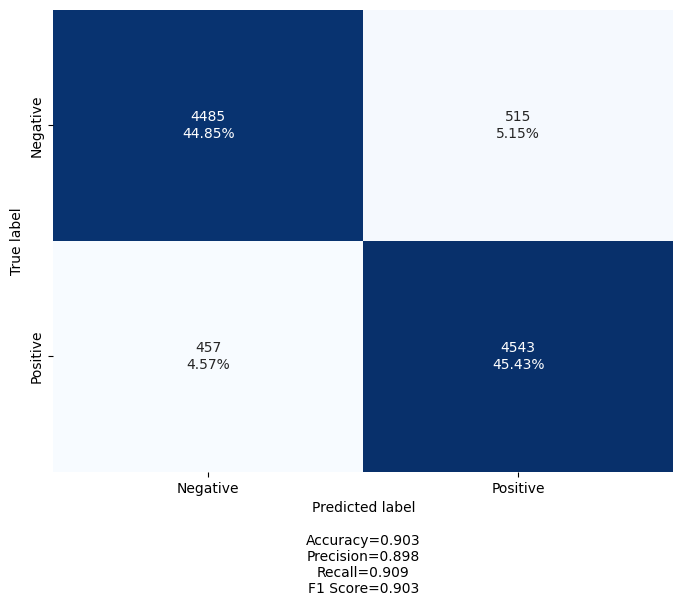

In [ ]:
originalclass_lr = y_test_nn
predictedclass_lr = reverse_one_hot_encoder(predict.cpu().detach().numpy(), number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

We got a slight improvment in comparison to the Logistic Regression.

# 7.RNN Models with Keras

In [ ]:
path = r"C:\Users\1217a\Desktop\Epam_DS\Homeworks\HW12\data\LargeMovieReviewDataset.csv"
data = pd.read_csv(path, sep=",")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data["sentiment"] = data["sentiment"].apply(lambda x: 1 if x=="positive" else 0)

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
y = data["sentiment"]
X = data

train_df, test_df, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.2,
                                                    shuffle=True, stratify=y)

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,review,sentiment
31056,"Why, oh why, is this trash considered a classi...",0
9188,"First off, Mexican Werewolf in Texas' title is...",0
8670,I rate this 10 out of 10. Why?<br /><br />* It...,1
36254,Anurag Basu who co-directed the flop KUCCH TO ...,0
24717,Burt Reynolds came to a point in his career wh...,0


In [ ]:
# How many examples of each class?
train_df.sentiment.value_counts()

1    20000
0    20000
Name: sentiment, dtype: int64

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 40000
Total test samples: 10000
Total samples: 50000


In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["review"].to_numpy(),
                                                                            train_df_shuffled["sentiment"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            stratify=train_df_shuffled["sentiment"].to_numpy(),
                                                                            random_state=seed) # random state for reproducibility

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(36000, 36000, 4000, 4000)

## Vectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

231

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 20000 # max number of words to have in our vocabulary
max_length = 250 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 216,    3, 6955,    8,   54,  948,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
I don't know what it is with these Brady kids. First, Barry Williams publicly brags about having sexy with his TV sister, Maureen McCormick, then about dating his TV mom, Florence Hederson. Then, Susan (Cindy) Olsen does music for a bunch of porno movies. Then Mike (Bobby) Lookinland gets in trouble for drunk driving. Finally, Maureen (Marcia) McCormick and Eve (Jan) Plum might have had a little same-sex fling on the side. Now, Christopher (Peter) Knight is pursued by a beautiful young model in her early-20s during his stint on "The Surreal Life", which at first was fun to watch, and now they are married and in a very volatile and hostile relationship. The last episode, where she posed for a bunch of nude photographs with another naked girl for a scrapbook to give to Christopher for his birthday, was not a good move on her part. And he dealt with it in a very mature fashion, just picking up and leaving to clear his head. I think he was always bowing to her every need and

<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   10,    90,   114,    49,     9,     7,    17,   127,  5650,
          323,    88,  2677,  1630, 12225,     1,    43,   260,  1251,
           17,    25,   239,   820,  9703,     1,    91,    43,  4570,
           25,   239,  1610, 14551,     1,    91,  2801,  9342, 12773,
          122,   208,    16,     3,   715,     5,  3955,    92,    91,
         1732,  3128,     1,   206,     8,  1092,    16,  1933,  1776,
          406,  9703,     1,     1,     4,  3534,  7150,     1,   231,
           26,    66,     3,   116,     1, 12583,    21,     2,   505,
          147,  1394,   794,  4530,     7,  6385,    33,     3,   307,
          182,  2101,     8,    42,     1,   288,    25, 15567,    21,
            2,  2260,   120,    60,    31,    88,    14,   246,     6,
          104,     4,   147,    35,    24,  1072,     4,     8,     3,
           53, 15966,     4,  7425,   612,     2,   230,   390,   113,
           59, 11957,    16, 

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 20000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'and']
Bottom 5 least common words: ['folksbr', 'flourish', 'flattering', 'flares', 'flaky']


## Embeddings

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
I thought this series was going to be another fun, action series with some dynamic plots and great performances. I was wrong. While I like Jamie Denton, this show is hardly worth watching at all, unless you enjoy watching some people brutalized and the actions of the agents supposedly warranted under the theme of "national security." The show is great propaganda for the current government, and spews out jingoism as though we talk that way every day. After a couple of episodes, it was boring the hell out of me, and I started watching reruns of House Invaders on BBCAmerica instead. Rather watch CSI and Without a Trace, without a doubt.      

Embedded version:


<tf.Tensor: shape=(1, 250, 128), dtype=float32, numpy=
array([[[ 0.0485434 , -0.00796898,  0.02427237, ...,  0.00068258,
         -0.00865446, -0.00643646],
        [-0.01624209, -0.03108075, -0.04761707, ...,  0.00955057,
         -0.00621026, -0.02932853],
        [-0.00313696, -0.03695718, -0.00124885, ..., -0.02854784,
         -0.04840422, -0.01007904],
        ...,
        [-0.00091302, -0.00329574,  0.04695744, ...,  0.02950332,
          0.02842051, -0.03433521],
        [-0.00091302, -0.00329574,  0.04695744, ...,  0.02950332,
          0.02842051, -0.03433521],
        [-0.00091302, -0.00329574,  0.04695744, ...,  0.02950332,
          0.02842051, -0.03433521]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0485434 , -0.00796898,  0.02427237, -0.00773771, -0.02664581,
       -0.0443275 , -0.01234939,  0.00706158,  0.03720028, -0.02221515,
        0.0095371 ,  0.03799713, -0.01625953, -0.03029195,  0.0377349 ,
        0.00378171,  0.02039467,  0.01041615, -0.03625632,  0.00700979,
       -0.01671425, -0.00585482,  0.00404818, -0.04247149,  0.03578427,
        0.00804494,  0.0048096 , -0.04125502,  0.04934794,  0.01394388,
        0.04857167, -0.02684479,  0.0189763 , -0.01578768,  0.03114839,
        0.0297323 , -0.02310201, -0.01877836,  0.01738186, -0.03788941,
        0.03487203, -0.016707  , -0.04445997, -0.01579662,  0.00483856,
       -0.02230526,  0.01357246, -0.01807227, -0.04575879, -0.01195564,
        0.04538872,  0.00724659, -0.049544  , -0.00245984, -0.04998133,
        0.00167578,  0.02027298,  0.01218568, -0.01328873,  0.03850117,
        0.01506439,  0.01133205, -0.02819315, -0.01072212, -0.00551153,
        0.025933

## Tunning the learing rate

In [ ]:
def model_builder(hp):
    model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                         output_dim=128,
                                         embeddings_initializer="uniform",
                                         input_length=max_length,
                                         name="embedding_lstm")


    # Create LSTM model
    inputs = layers.Input(shape=(1,), dtype="string")
    x = text_vectorizer(inputs)
    x = model_embedding(x)
    print(x.shape)
    # x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
    x = layers.LSTM(64)(x) # return vector for whole sequence
    print(x.shape)
    # x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model_lstm = tf.keras.Model(inputs, outputs, name="model_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  # hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  # model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy'])

    return model_lstm

In [ ]:
def model_buider()
    # Set random seed and create embedding layer (new embedding layer for each model)
    tf.random.set_seed(42)
    from tensorflow.keras import layers
    model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                         output_dim=128,
                                         embeddings_initializer="uniform",
                                         input_length=max_length,
                                         name="embedding_lstm")


    # Create LSTM model
    inputs = layers.Input(shape=(1,), dtype="string")
    x = text_vectorizer(inputs)
    x = model_embedding(x)
    print(x.shape)
    # x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
    x = layers.LSTM(64)(x) # return vector for whole sequence
    print(x.shape)
    # x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model_lstm = tf.keras.Model(inputs, outputs, name="model_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)
    return model_lstm

(None, 250, 128)
(None, 64)


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

tuner.search(train_sentences, train_labels, epochs=5, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 4 Complete [00h 09m 03s]
val_accuracy: 0.5880555510520935

Best val_accuracy So Far: 0.773194432258606
Total elapsed time: 00h 20m 57s

The hyperparameter search is complete.The optimal learning rate for the optimizer
is 0.01.



So later in the model I will use deminishing learning rate and will start with learning rate higher than the optimal found by the tuner.

## Callbacks

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.1)

In [ ]:
checkpoint = ModelCheckpoint("tf", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', save_freq="epoch")

In [ ]:
callbacks = [earlystop, learning_rate_reduction, checkpoint, ]

## 7.1 LSTM

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_lstm")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_lstm = tf.keras.Model(inputs, outputs, name="model_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)

(None, 250, 128)
(None, 64)


In [ ]:
# Compile model
model_lstm.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_lstm.summary()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_lstm (Embedding)  (None, 250, 128)          2560000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,609,473
Trainable params: 2,609,473
Non-trainable params: 0
______________________________________________

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(1)

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
# Fit model
model_lstm_history = model_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("LSTM")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.5521
Epoch 1: val_loss improved from inf to 0.68245, saving model to tf


1125/1125 [==============================] - 108s 96ms/step - loss: 0.6731 - accuracy: 0.5521 - val_loss: 0.6825 - val_accuracy: 0.4988 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.7304
Epoch 2: val_loss improved from 0.68245 to 0.32754, saving model to tf


1125/1125 [==============================] - 363s 323ms/step - loss: 0.5009 - accuracy: 0.7304 - val_loss: 0.3275 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9192
Epoch 3: val_loss improved from 0.32754 to 0.28203, saving model to tf


1125/1125 [==============================] - 381s 338ms/step - loss: 0.2168 - accuracy: 0.9192 - val_loss: 0.2820 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9596
Epoch 4: val_loss did not improve from 0.28203
1125/1125 [==============================] - 370s 329ms/step - loss: 0.1205 - accuracy: 0.9596 - val_loss: 0.3210 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 5/5
1125/1125 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9808
Epoch 5: val_loss did not improve from 0.28203
1125/1125 [==============================] - 368s 327ms/step - loss: 0.0667 - accuracy: 0.9808 - val_loss: 0.4193 - val_accuracy: 0.8740 - lr: 0.0010


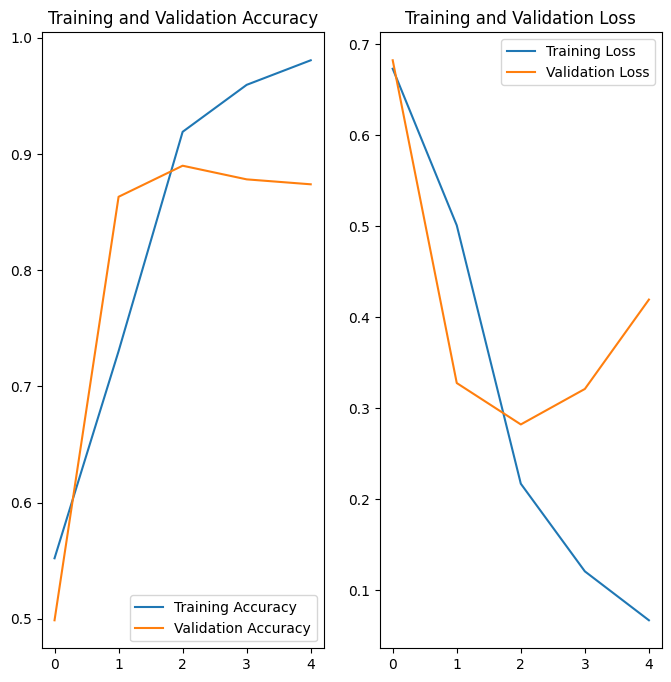

In [ ]:
acc = model_lstm_history.history["accuracy"]
val_acc = model_lstm_history.history["val_accuracy"]

loss = model_lstm_history.history['loss']
val_loss = model_lstm_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
def reverse_one_hot_encoder(predictions, number_of_classes = 1, column_names = ["sentiment"]):
  preds = pd.DataFrame(predictions, columns = column_names)
  preds["target"] = 0
  for col in column_names:
    preds["target"] = preds[col].apply(lambda x: 0 if 1-x > x-0 else 1)
  return preds["target"]

In [ ]:
predict = model_lstm.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5000
           1       0.91      0.84      0.87      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

                                        Confusion Matrix


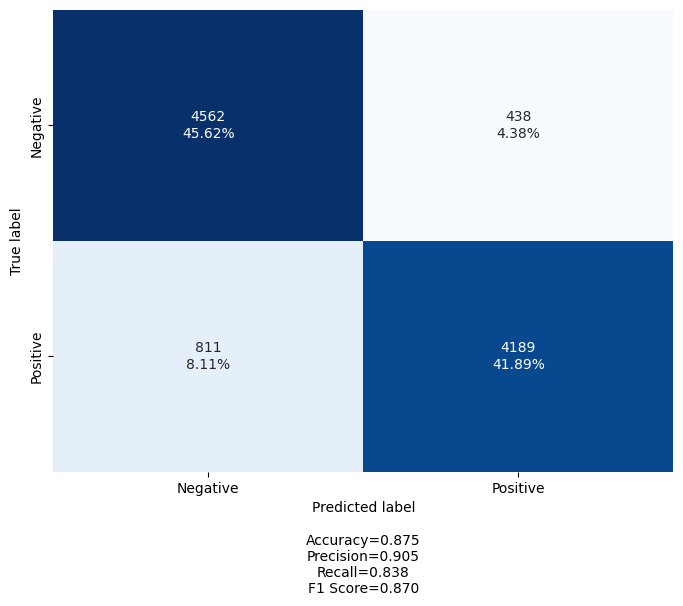

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

## 7.2 Bidirectional LSTM

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
# from tensorflow.keras import layers
model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_bi")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_bi_lstm = tf.keras.Model(inputs, outputs, name="model_Bidirectional")

In [ ]:
# Compile model
model_bi_lstm.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_bi_lstm.summary()

Model: "model_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_bi (Embedding)    (None, 250, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,658,945
Trainable params: 2,658

In [ ]:
# Fit model
model_bi_lstm_history = model_bi_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("WTV-LSTM")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.6757
Epoch 1: val_loss did not improve from 0.30398
1125/1125 [==============================] - 559s 495ms/step - loss: 0.6020 - accuracy: 0.6757 - val_loss: 0.6078 - val_accuracy: 0.6308 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.7801
Epoch 2: val_loss did not improve from 0.30398
1125/1125 [==============================] - 514s 457ms/step - loss: 0.4789 - accuracy: 0.7801 - val_loss: 0.4220 - val_accuracy: 0.8188 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.3074 - accuracy: 0.8777
Epoch 3: val_loss did not improve from 0.30398
1125/1125 [==============================] - 512s 455ms/step - loss: 0.3074 - accuracy: 0.8777 - val_loss: 0.3318 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9276
Epoch 4: val_loss did

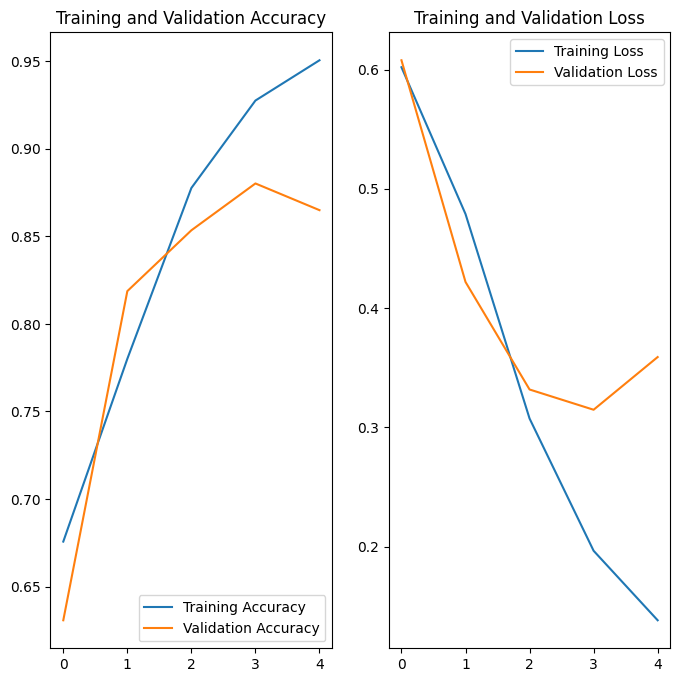

In [ ]:
acc = model_bi_lstm_history.history["accuracy"]
val_acc = model_bi_lstm_history.history["val_accuracy"]

loss = model_bi_lstm_history.history['loss']
val_loss = model_bi_lstm_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
predict = model_bi_lstm.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5000
           1       0.87      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

                                        Confusion Matrix


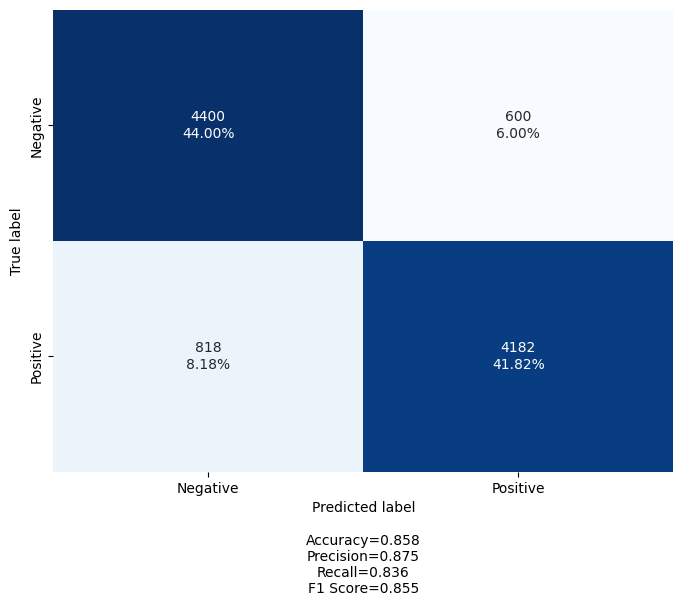

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

## 7.3 GRU

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
# from tensorflow.keras import layers
model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_gru")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_gru = tf.keras.Model(inputs, outputs, name="model_GRU")

In [ ]:
# Compile GRU model
model_gru.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_gru.summary()

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_gru (Embedding)   (None, 250, 128)          2560000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,597,313
Trainable params: 2,597,313
Non-trainable params: 0
_______________________________________________

In [ ]:
# Fit model
model_gru_history = model_gru.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("GRU")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5348
Epoch 1: val_loss did not improve from 0.30398
1125/1125 [==============================] - 110s 97ms/step - loss: 0.6796 - accuracy: 0.5348 - val_loss: 0.3715 - val_accuracy: 0.8407 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.8892
Epoch 2: val_loss improved from 0.30398 to 0.24898, saving model to tf


INFO:tensorflow:Assets written to: tf\assets


INFO:tensorflow:Assets written to: tf\assets


1125/1125 [==============================] - 113s 100ms/step - loss: 0.2682 - accuracy: 0.8892 - val_loss: 0.2490 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9506
Epoch 3: val_loss did not improve from 0.24898
1125/1125 [==============================] - 95s 85ms/step - loss: 0.1375 - accuracy: 0.9506 - val_loss: 0.2726 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9802
Epoch 4: val_loss did not improve from 0.24898
1125/1125 [==============================] - 95s 84ms/step - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.3580 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 5/5
1125/1125 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9923
Epoch 5: val_loss did not improve from 0.24898
1125/1125 [==============================] - 95s 85ms/step - loss: 0.0281 - accuracy: 0.9923 - val_loss: 0.4490 - val_accu

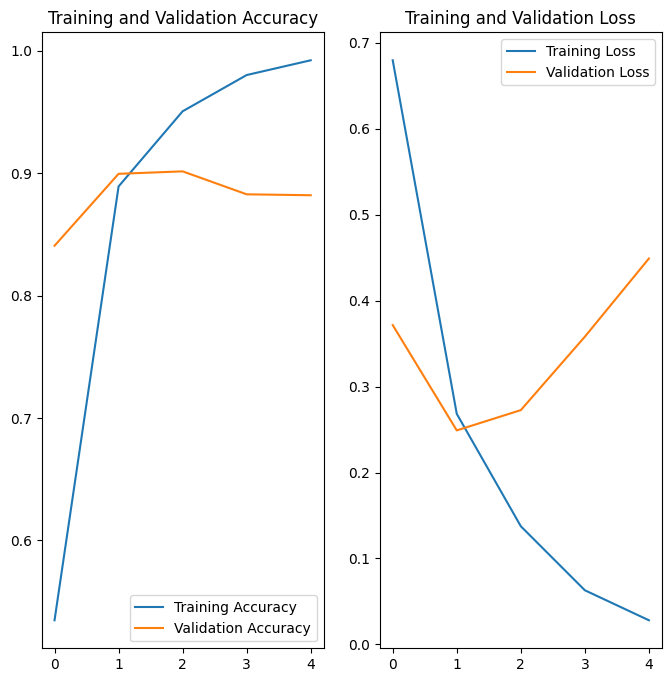

In [ ]:
acc = model_gru_history.history["accuracy"]
val_acc = model_gru_history.history["val_accuracy"]

loss = model_gru_history.history['loss']
val_loss = model_gru_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
predict = model_gru.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      5000
           1       0.88      0.93      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

                                        Confusion Matrix


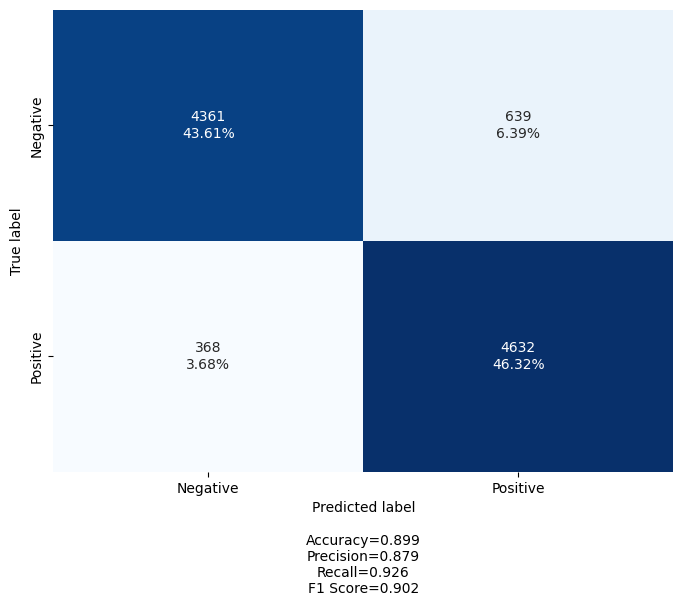

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

## 7.4 Word2vec

In [ ]:
texts=train_sentences

In [ ]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(train_sentences)
sequences_train = tokenizer.texts_to_sequences(train_sentences)
sequences_valid=tokenizer.texts_to_sequences(val_sentences)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 90269 unique tokens.


In [ ]:
X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
y_train = train_labels # to_categorical(np.asarray(labels[train_data.index]))
y_val = val_labels # to_categorical(np.asarray(labels[val_data.index]))
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (36000, 2375) (4000, 2375)
Shape of label train and validation tensor: (36000,) (4000,)


In [ ]:
word_vectors =  gensim.downloader.load('word2vec-google-news-300')

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
wtv_embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = wtv_embedding_layer(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_wtv_lstm = tf.keras.Model(inputs, outputs, name="model_wtv_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)

(None, 250, 300)
(None, 64)


In [ ]:
# Compile model
model_wtv_lstm.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_wtv_lstm.summary()

Model: "model_wtv_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 250, 300)          6000000   
                                                                 
 lstm_5 (LSTM)               (None, 64)                93440     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,093,505
Trainable params: 6,093,505
Non-trainable params: 0
__________________________________________

In [ ]:
# Fit model
model_wtv_lstm_history = model_wtv_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("WTV-LSTM")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.5227
Epoch 1: val_loss did not improve from 0.28203
1125/1125 [==============================] - 699s 620ms/step - loss: 0.6882 - accuracy: 0.5227 - val_loss: 0.6884 - val_accuracy: 0.5113 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.7179
Epoch 2: val_loss did not improve from 0.28203
1125/1125 [==============================] - 688s 611ms/step - loss: 0.5607 - accuracy: 0.7179 - val_loss: 0.7064 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.4431 - accuracy: 0.8088
Epoch 3: val_loss did not improve from 0.28203
1125/1125 [==============================] - 685s 609ms/step - loss: 0.4431 - accuracy: 0.8088 - val_loss: 0.3531 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9097
Epoch 4: val_loss did

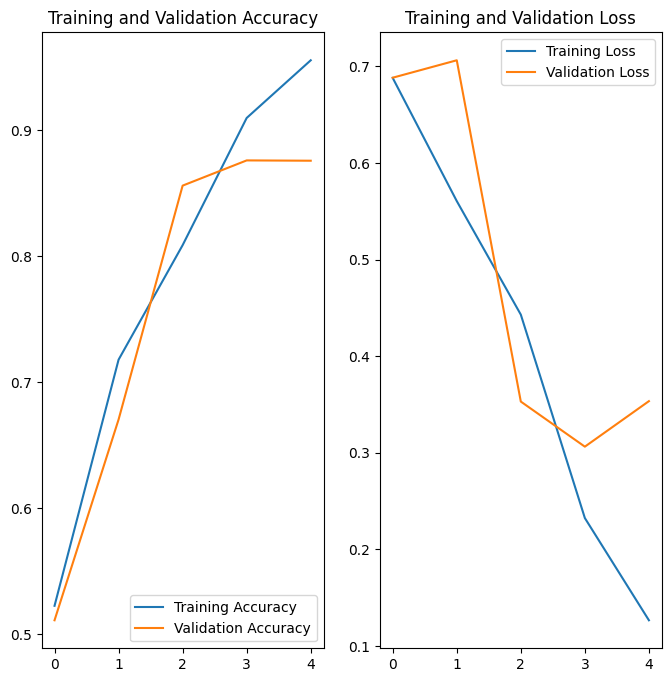

In [ ]:
acc = model_wtv_lstm_history.history["accuracy"]
val_acc = model_wtv_lstm_history.history["val_accuracy"]

loss = model_wtv_lstm_history.history['loss']
val_loss = model_wtv_lstm_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
predict = model_wtv_lstm.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.87      0.90      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

                                        Confusion Matrix


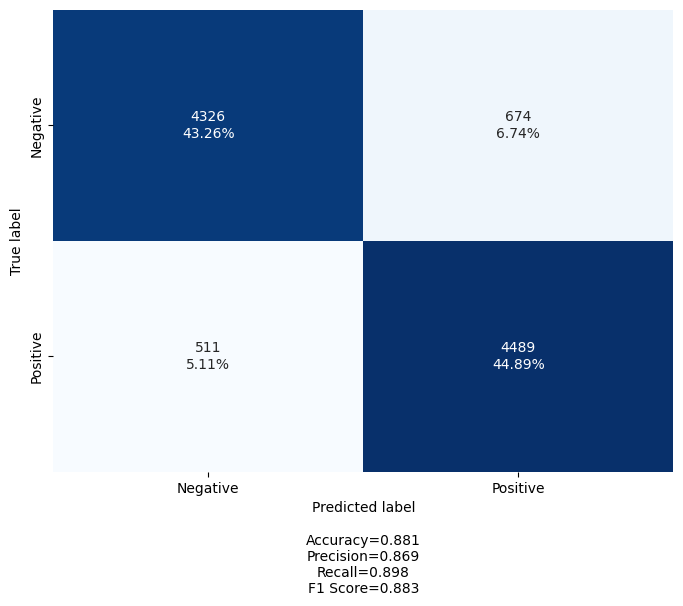

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

# 8.Additional

## 8.1 FastText

In [ ]:
word_vectors =  gensim.downloader.load('fasttext-wiki-news-subwords-300')

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
ft_embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = ft_embedding_layer(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_ft_lstm = tf.keras.Model(inputs, outputs, name="model_ft_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)

(None, 250, 300)
(None, 64)


In [ ]:
# Compile model
model_ft_lstm.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_ft_lstm.summary()

Model: "model_ft_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 250, 300)          6000000   
                                                                 
 lstm_6 (LSTM)               (None, 64)                93440     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,093,505
Trainable params: 6,093,505
Non-trainable params: 0
___________________________________________

In [ ]:
# Fit model
model_ft_lstm_history = model_ft_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("WTV-LSTM")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5255
Epoch 1: val_loss did not improve from 0.28203
1125/1125 [==============================] - 564s 501ms/step - loss: 0.6854 - accuracy: 0.5255 - val_loss: 0.6696 - val_accuracy: 0.5560 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.6835
Epoch 2: val_loss did not improve from 0.28203
1125/1125 [==============================] - 482s 428ms/step - loss: 0.5793 - accuracy: 0.6835 - val_loss: 0.3518 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.8989
Epoch 3: val_loss did not improve from 0.28203
1125/1125 [==============================] - 498s 442ms/step - loss: 0.2594 - accuracy: 0.8989 - val_loss: 0.2968 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9509
Epoch 4: val_loss did

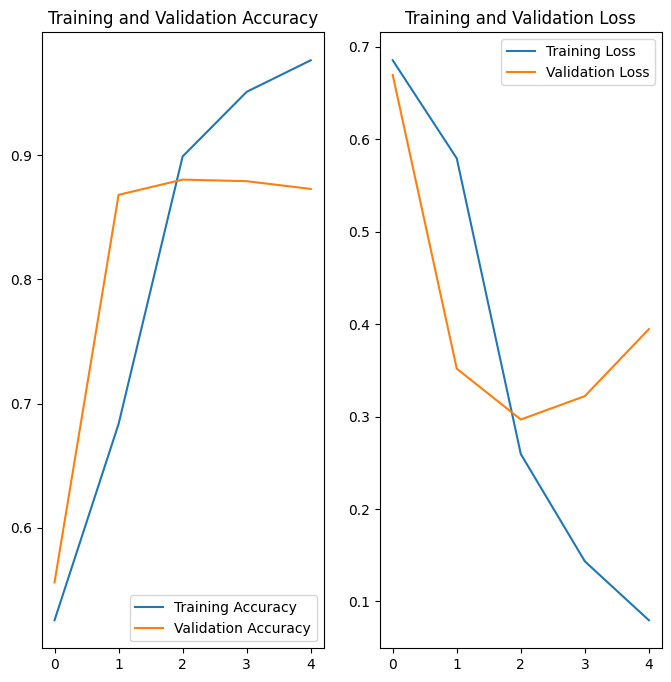

In [ ]:
acc = model_ft_lstm_history.history["accuracy"]
val_acc = model_ft_lstm_history.history["val_accuracy"]

loss = model_ft_lstm_history.history['loss']
val_loss = model_ft_lstm_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
predict = model_ft_lstm.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      5000
           1       0.86      0.91      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

                                        Confusion Matrix


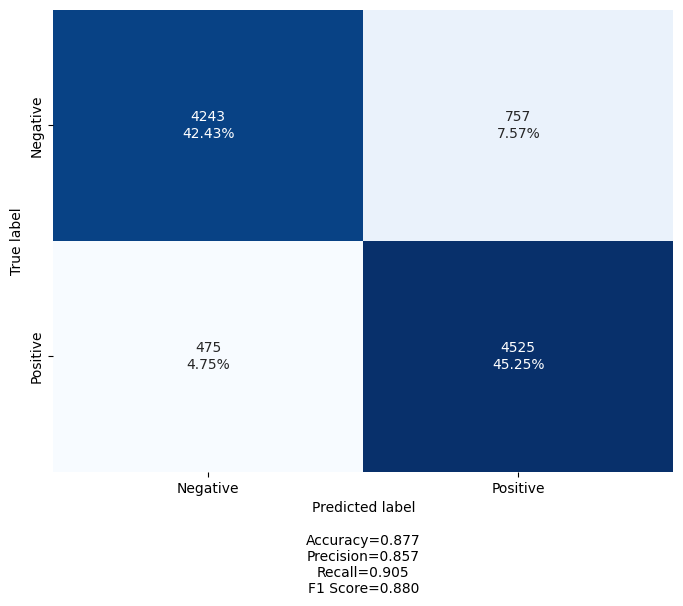

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

## 8.2 GloVe

In [ ]:
word_vectors =  gensim.downloader.load('glove-wiki-gigaword-300')

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
gve_embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = gve_embedding_layer(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_gve_lstm = tf.keras.Model(inputs, outputs, name="model_gve_LSTM")# Set random seed and create embedding layer (new embedding layer for each model)

(None, 250, 300)
(None, 64)


In [ ]:
# Compile model
model_gve_lstm.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_gve_lstm.summary()

Model: "model_gve_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 250, 300)          6000000   
                                                                 
 lstm_7 (LSTM)               (None, 64)                93440     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,093,505
Trainable params: 6,093,505
Non-trainable params: 0
__________________________________________

In [ ]:
# Fit model
model_gve_lstm_history = model_gve_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[*callbacks, TensorBoard("WTV-LSTM")])

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5166
Epoch 1: val_loss did not improve from 0.28203
1125/1125 [==============================] - 509s 452ms/step - loss: 0.6890 - accuracy: 0.5166 - val_loss: 0.6604 - val_accuracy: 0.5785 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 0.6003 - accuracy: 0.6569
Epoch 2: val_loss did not improve from 0.28203
1125/1125 [==============================] - 455s 405ms/step - loss: 0.6003 - accuracy: 0.6569 - val_loss: 0.3933 - val_accuracy: 0.8397 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.8944
Epoch 3: val_loss did not improve from 0.28203
1125/1125 [==============================] - 439s 390ms/step - loss: 0.2666 - accuracy: 0.8944 - val_loss: 0.2843 - val_accuracy: 0.8825 - lr: 0.0010
Epoch 4/5
1125/1125 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9511
Epoch 4: val_loss did

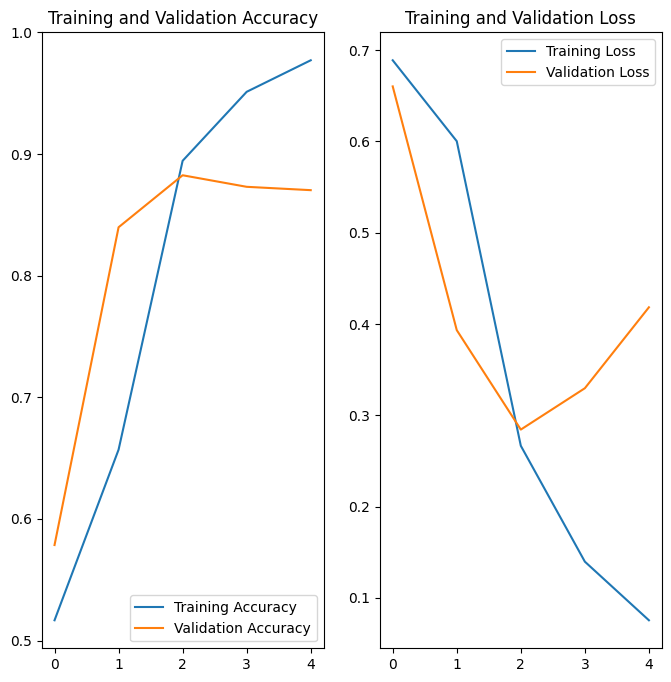

In [ ]:
acc = model_gve_lstm_history.history["accuracy"]
val_acc = model_gve_lstm_history.history["val_accuracy"]

loss = model_gve_lstm_history.history['loss']
val_loss = model_gve_lstm_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
predict = model_gve_lstm.predict_generator(test_df["review"])

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

                                        Confusion Matrix


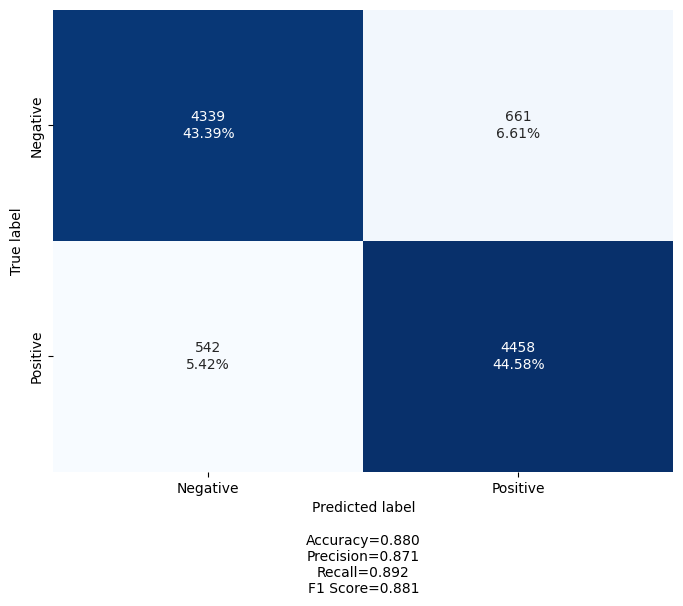

In [ ]:
originalclass_lr = test_df["sentiment"]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Negative", "Positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

# 9.Conclusion

With RNN models I was able to achieve the quite good accuracy of the predictions. However, the best results were similar to what was achived by the linear model based on tf-idf vectorization. Thus I belive the linear models also could be a good choice for this particular problem. Among the RNN models the best performance was achived with GRU model without any pretrained word embeddings, so that would be my choice for the RNN models. The pretrained embedding in this case did not give almost any improvement. I believe, it is the result of the fact that we have quite a big dataset, and our models do a good job to learn the embedding on their own. In case of having less data, I think the usefullness of the pretrained embeddings will be higher.